In [57]:
import glob
import os
import dicom2nifti
from skimage.transform import resize
import SimpleITK as sitk

In [2]:
def convert_image(input_file_name, output_file_name):
    image_file_reader = sitk.ImageFileReader()
    image_file_reader.SetImageIO('GDCMImageIO')
    image_file_reader.SetFileName(input_file_name)
    image_file_reader.ReadImageInformation()
    image_size = list(image_file_reader.GetSize())
    if len(image_size) == 3 and image_size[2] == 1:
        image_size[2] = 0
    image_file_reader.SetExtractSize(image_size)
    image = image_file_reader.Execute()
    sitk.WriteImage(image, output_file_name)

In [3]:
cases = glob.glob("/mnt/datasets/ben/synth_testing/all_data/*")
count = 0
cases_three_contrasts = []
success_cases = []
save_dir = '/mnt/raid/jiang/projects/SubtleGAN/data/Spine'
for case in cases:
    case_name = case.split("/")[-1]
    if "_Id_" in case_name:
        contrasts = glob.glob(f"{case}/study/*")
    else:
        contrasts = glob.glob(f"{case}/*")
    t1_dir = None 
    t2_dir = None
    stir_dir = None
    for contrast in contrasts:
        contrast_name = contrast.split("/")[-1].lower()
        if 'sag' in contrast_name and "dne" not in contrast_name and "loc" not in contrast_name and "post" not in contrast_name and "fast" not in contrast_name and "subtle" not in contrast_name and "opt" not in contrast_name and "c+" not in contrast_name:
            if "t1" in contrast_name and "flair" not in contrast_name:
                t1_dir = contrast
            elif "t2" in contrast_name:
                t2_dir = contrast
            elif "stir" in contrast_name:
                stir_dir = contrast
    if t1_dir and t2_dir and stir_dir:
        cases_three_contrasts.append(case)
        try:
            save_folder = f"{save_dir}/{case_name}"
            os.makedirs(save_folder, exist_ok=True)
            # use simpleitk for conversion for cases using Siemens MAGNETOM Altea
            if "Ra_Mri" in case_name:
                convert_image(glob.glob(f"{t1_dir}/*.dcm")[0], f"{save_folder}/t1.nii.gz")
                convert_image(glob.glob(f"{t2_dir}/*.dcm")[0], f"{save_folder}/t2.nii.gz")
                convert_image(glob.glob(f"{stir_dir}/*.dcm")[0], f"{save_folder}/stir.nii.gz")
            else:
                dicom2nifti.dicom_series_to_nifti(t1_dir, f"{save_folder}/t1.nii.gz", reorient_nifti=True)
                dicom2nifti.dicom_series_to_nifti(t2_dir, f"{save_folder}/t2.nii.gz", reorient_nifti=True)
                dicom2nifti.dicom_series_to_nifti(stir_dir, f"{save_folder}/stir.nii.gz", reorient_nifti=True)
            count += 1
            print(case)
            success_cases.append(case)
        except:
            os.system(f"rm -rf {save_folder}")
            pass

/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_5296486
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_With_Without_Contrast_-_1004511768
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Cervical_Without_Contrast_-_1004420612
/mnt/datasets/ben/synth_testing/all_data/Lumbar_Routine_-_4679192
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7029159
/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24723
/mnt/datasets/ben/synth_testing/all_data/102_Id_050


/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/dicom2nifti/convert_siemens.py:276: RuntimeWarning: invalid value encountered in true_divide
  current_direction = current_direction / numpy.linalg.norm(current_direction)
Image orientations not consistent through all slices
---------------------------------------------------------
[0.0078301  0.98570347 0.16830734] [2.800e-14 1.000e+00 4.897e-12]
[-0.04580795  0.16848938 -0.98463849] [-5.75352683e-03  4.89700000e-12 -9.99983448e-01]
---------------------------------------------------------


/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004346489
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7035040
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004546431
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004488137
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004068333
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7034874
/mnt/datasets/ben/synth_testing/all_data/CSpine_-_1004007423
/mnt/datasets/ben/synth_testing/all_data/LSpine_WO_-_20213JTI19BEG
/mnt/datasets/ben/synth_testing/all_data/102_Id_108
/mnt/datasets/ben/synth_testing/all_data/102_Id_021
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004613372
/mnt/datasets/ben/synth_testing/all_data/Lumbar_W_Wo_-_5276939
/mnt/datasets/ben/synth_testing/all_data/Lumbar_Wo_-_41063
/mnt/datasets/ben/synth_testing/all_data/Mri_Cervical_Spine_With_3D_Reconstruction_-_24560
/mnt/dataset

Missing slices (slice count mismatch between timepoint 14 and 15)
---------------------------------------------------------
(512, 512, 2)
(512, 512, 6)
---------------------------------------------------------


/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_25164
/mnt/datasets/ben/synth_testing/all_data/CSpine_WO_-_202148BA62FAE


Image orientations not consistent through all slices
---------------------------------------------------------
[ 0.0e+00  1.0e+00 -3.2e-05] [0. 1. 0.]
[-1.70330e-02 -3.20000e-05 -9.99854e-01] [ 0.10686   0.       -0.994274]
---------------------------------------------------------


/mnt/datasets/ben/synth_testing/all_data/Lumbar_Routine_-_4660385
/mnt/datasets/ben/synth_testing/all_data/CSpine_WO_-_36131
/mnt/datasets/ben/synth_testing/all_data/LSpine_WO_-_20213U2L9RVM7
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Thoracic_Without_Contrast_-_1004537373
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7039155
/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24632
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004190469
/mnt/datasets/ben/synth_testing/all_data/Lumbar_Routine_-_4630166
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004420613
/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24774
/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004710780
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004446929
/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24619
/mnt/datasets/ben

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/dicom2nifti/convert_ge.py:203: RuntimeWarning: invalid value encountered in true_divide
  current_direction = current_direction / numpy.linalg.norm(current_direction)


/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_5293004
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Cervical_Without_Contrast_-_1004636683
/mnt/datasets/ben/synth_testing/all_data/LSpine_WO_-_202148D125650
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004576544
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7033781
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7029927
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004494871
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004493141
/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004594597
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_5296105
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004561974
/mnt/datasets/ben/synth_testing/all_data/CSpine_WO_-_20212WDMM84Z2
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Cervical_Without_Contrast_-_1004312615
/mnt/datasets/ben/synth_tes

Image orientations not consistent through all slices
---------------------------------------------------------
[-1.0e-06  1.0e+00  6.2e-05] [0. 1. 0.]
[ 3.27760e-02  6.20000e-05 -9.99462e-01] [-0.065217  0.       -0.997871]
---------------------------------------------------------


/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7040269
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004624902
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7019966
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7029039
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004513185
/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004457578
/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004644693
/mnt/datasets/ben/synth_testing/all_data/102_Id_052
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004371950
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7103882
/mnt/datasets/ben/synth_testing/all_data/LSpine_WO_-_202143Q6X7MET
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004391060
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004514172
/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004685587
/mnt/datasets/ben/synth_

Image orientations not consistent through all slices
---------------------------------------------------------
[ 0.0e+00  1.0e+00 -2.8e-05] [0. 1. 0.]
[-1.48650e-02 -2.80000e-05 -9.99889e-01] [ 0.015122  0.       -0.999885]
---------------------------------------------------------


/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004445423
/mnt/datasets/ben/synth_testing/all_data/Lumbar_Routine_-_4665031
/mnt/datasets/ben/synth_testing/all_data/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24648
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004629914
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004414635
/mnt/datasets/ben/synth_testing/all_data/Spine_CTL_Spine_-_1004364049
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004144692
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Thoracic_Without_Contrast_-_1004125294
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7018671
/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Cervical_Without_Contrast_-_1004546275
/mnt/datasets/ben/synth_testing/all_data/Spines_Cervical_-_7023928
/mnt/datasets/ben/synth_testing/all_data/Spine_Cspine_-_1004612078
/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_5299211
/

In [4]:
print(count)
# /mnt/datasets/ben/synth_testing/all_data/102_Id_050
# /mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004656060
# /mnt/datasets/ben/synth_testing/all_data/CSpine_WO_-_202148BA62FAE
# /mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7039272
# /mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004629123
# /mnt/datasets/ben/synth_testing/all_data/LSpine_WoW_-_36142

# /mnt/datasets/ben/synth_testing/all_data/Cervical_Wo_-_40963/OSag_T1_SE_7
# /mnt/datasets/ben/synth_testing/all_data/Cervical_Wo_-_40963/RTSAG_OBL_T2_EFFECTED_SIDE_11
# /mnt/datasets/ben/synth_testing/all_data/Cervical_Wo_-_40963/OSag_Stir_ir_5

# /mnt/datasets/ben/synth_testing/all_data/Thoracic_Wo_-_41164/OSag_T1AP_SAT_PULSE_6
# /mnt/datasets/ben/synth_testing/all_data/Thoracic_Wo_-_41164/OSag_T2_NO_SAT_PULSE_AP_3
# /mnt/datasets/ben/synth_testing/all_data/Thoracic_Wo_-_41164/OSag_Stir_ir_5

145


In [16]:
# split dataset 
import random
import pickle
images = glob.glob("../../data/Spine/*")
random.shuffle(images)
train_ratio = 0.8
val_ratio = 0.10
test_ratio = 0.10
cases = [case.split("/")[-1] for case in images]
n_cases = len(cases)
n_train = int(n_cases*train_ratio)
n_val = int(n_cases*val_ratio)
n_test = int(n_cases*test_ratio)

train_cases = [case.split("/")[-1] for case in images[:n_train]]
val_cases = [case.split("/")[-1] for case in images[n_train:n_train+n_val]]
test_cases = [case.split("/")[-1] for case in images[n_train+n_val:]]

data_split = {'train_cases': train_cases, 'val_cases': val_cases, "test_cases": test_cases}
with open('data_split_spine.pickle', 'wb') as handle:
    pickle.dump(data_split, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
print(n_train)
print(n_val)
print(n_test)

109
13
13


In [33]:
import pickle
# split dataset into train/test/val
with open('data_split_spine.pickle', 'rb') as handle:
    data_split = pickle.load(handle)
train_dir = '/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/'
test_dir = '/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/test/'
val_dir = '/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
data_dir = "/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine"
for case in data_split['train_cases']:
    case_dir = os.path.join(data_dir, case)
    cmd = f"ln -s {case_dir} {train_dir}"
    #print(cmd)
    os.system(cmd)
    
for case in data_split['val_cases']:
    case_dir = os.path.join(data_dir, case)
    cmd = f"ln -s {case_dir} {val_dir}"
    #print(cmd)
    os.system(cmd)
    
for case in data_split['test_cases']:
    case_dir = os.path.join(data_dir, case)
    cmd = f"ln -s {case_dir} {test_dir}"
    #print(cmd)
    os.system(cmd)

In [20]:
# preprocessing: divide each case by the mean
def preprocess_data(data, norm=True):
    if norm:
        data = data/data.mean()
    #data = data[38:198, 32:224, :]
    #data = np.pad(data, ((8,8), (8,8), (0,0)), 'constant', constant_values=0)
    return data

In [36]:
import nibabel as nib
import numpy as np
data_types = ['train', 'test', 'val']
for data_type in data_types:
    data_dir = f'/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/{data_type}'
    save_dir = f'/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_slices/{data_type}'
    cases = glob.glob(f"{data_dir}/*")
    for case in cases:
        print(case)
        case_name = case.split("/")[-1]
        save_case_dir = os.path.join(save_dir, case_name)
        os.makedirs(save_case_dir, exist_ok=True)
        t1 = preprocess_data(nib.load(glob.glob(f"{case}/t1.nii.gz")[0]).get_fdata())
        t2 = preprocess_data(nib.load(glob.glob(f"{case}/t2.nii.gz")[0]).get_fdata())
        stir = preprocess_data(nib.load(glob.glob(f"{case}/stir.nii.gz")[0]).get_fdata())
        if t2.shape[-1] > 50:
            t1 = t1.transpose(1, 2, 0)
            t2 = t2.transpose(1, 2, 0)
            stir = stir.transpose(1, 2, 0)
        print(t2.shape)
        for idx in range(0, t2.shape[-1]):
            slice_i = np.stack([t1[:, :, idx], t2[:, :, idx], stir[:, :, idx]], axis=0)
            fn = os.path.join(save_case_dir, f"{idx:03d}.npy")
            np.save(fn, slice_i)

/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Mr_Thoracic_Spine_WO_Con_-_1
(448, 448, 13)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Spines_Cervical_-_7023928
(768, 768, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004546431
(416, 696, 17)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Spine_Cspine_-_1004568597
(384, 540, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Spine_CTL_Spine_-_1004467324
(384, 648, 21)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004629914
(416, 696, 17)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/CSpine_WoW_-_36141
(512, 512, 12)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Lumbar_Routine_-_4

(576, 864, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24485
(512, 512, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Ra_Mri_Spine_Thoracic_Without_Contrast_-_1004125294
(576, 960, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Spines_Lumbar_-_7043721
(320, 320, 19)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004494871
(416, 696, 17)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/LSpine_WO_-_202143Q6X7MET
(384, 384, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Lumbar_Routine_-_4665031
(512, 512, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/train/Spine_CTL_Spine_-_1004446929
(384, 540, 14)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_

(384, 540, 16)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Spine_Lspine_-_1004610054
(384, 648, 18)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004391060
(416, 696, 21)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/CSpine_WO_-_20213YE9I8TF6
(320, 320, 11)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Spines_Cervical_-_5296486
(768, 768, 15)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Mri_Lumbar_Spine_With_3D_Reconstruction_-_24774
(512, 512, 13)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Spines_Lumbar_-_7035040
(320, 320, 17)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/Spine_CTL_Spine_-_1004445423
(384, 648, 16)
/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_splitted/val/102_Id_103
(512, 51

In [5]:
cases = set(cases)
success_cases = set(success_cases)
cases_three_contrasts = set(cases_three_contrasts)
failed_cases = cases_three_contrasts - success_cases

In [6]:
for case in failed_cases:
    print(case)

/mnt/datasets/ben/synth_testing/all_data/101_Id_005
/mnt/datasets/ben/synth_testing/all_data/102_Id_106
/mnt/datasets/ben/synth_testing/all_data/102_Id_014
/mnt/datasets/ben/synth_testing/all_data/101_Id_012
/mnt/datasets/ben/synth_testing/all_data/102_Id_026
/mnt/datasets/ben/synth_testing/all_data/102_Id_053
/mnt/datasets/ben/synth_testing/all_data/102_Id_119
/mnt/datasets/ben/synth_testing/all_data/101_Id_006


In [ ]:


#/mnt/datasets/ben/synth_testing/all_data/102_Id_050
#/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/dicom2nifti/convert_siemens.py:276: RuntimeWarning: invalid value encountered in true_divide
#  current_direction = current_direction / numpy.linalg.norm(current_direction)
#Image orientations not consistent through all slices
#---------------------------------------------------------
#[0.0078301  0.98570347 0.16830734] [2.800e-14 1.000e+00 4.897e-12]
#[-0.04580795  0.16848938 -0.98463849] [-5.75352683e-03  4.89700000e-12 -9.99983448e-01]
#---------------------------------------------------------

/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004656060
Missing slices (slice count mismatch between timepoint 14 and 15)
---------------------------------------------------------
(512, 512, 2)
(512, 512, 6)
---------------------------------------------------------

/mnt/datasets/ben/synth_testing/all_data/CSpine_WO_-_202148BA62FAE
Image orientations not consistent through all slices
---------------------------------------------------------
[ 0.0e+00  1.0e+00 -3.2e-05] [0. 1. 0.]
[-1.70330e-02 -3.20000e-05 -9.99854e-01] [ 0.10686   0.       -0.994274]
---------------------------------------------------------

/mnt/datasets/ben/synth_testing/all_data/Spines_Lumbar_-_7039272
/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/dicom2nifti/convert_ge.py:203: RuntimeWarning: invalid value encountered in true_divide
  current_direction = current_direction / numpy.linalg.norm(current_direction)

/mnt/datasets/ben/synth_testing/all_data/Spine_Lspine_-_1004629123
Image orientations not consistent through all slices
---------------------------------------------------------
[-1.0e-06  1.0e+00  6.2e-05] [0. 1. 0.]
[ 3.27760e-02  6.20000e-05 -9.99462e-01] [-0.065217  0.       -0.997871]
---------------------------------------------------------

/mnt/datasets/ben/synth_testing/all_data/LSpine_WoW_-_36142
Image orientations not consistent through all slices
---------------------------------------------------------
[ 0.0e+00  1.0e+00 -2.8e-05] [0. 1. 0.]
[-1.48650e-02 -2.80000e-05 -9.99889e-01] [ 0.015122  0.       -0.999885]
---------------------------------------------------------

In [38]:
import pydicom
import numpy as np
def get_dicom_vol(dirpath_dicom):
    dcm_files = sorted([f for f in glob.glob(f'{dirpath_dicom}/*.dcm')])
    return np.array([pydicom.dcmread(f).pixel_array for f in dcm_files])

In [62]:
stir = '/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004430834/SAG_STIR_4'
stir_subtle = '/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Lumbar_Without_Contrast_-_1004430834/SAG_STIR_REPEAT_8/'

In [63]:
s = get_dicom_vol(stir)
s_s = get_dicom_vol(stir_subtle)

In [81]:
t = get_dicom_vol('/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Thoracic_Without_Contrast_-_1004644220/SAG_T2_5/')

In [82]:
t.shape

(1, 17, 864, 576)

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

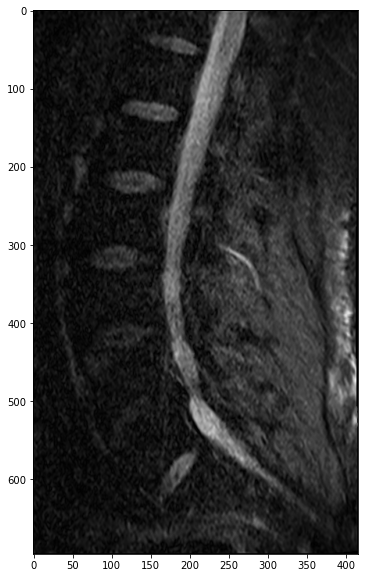

In [71]:
plt.imshow(s[0][8], cmap='gray')

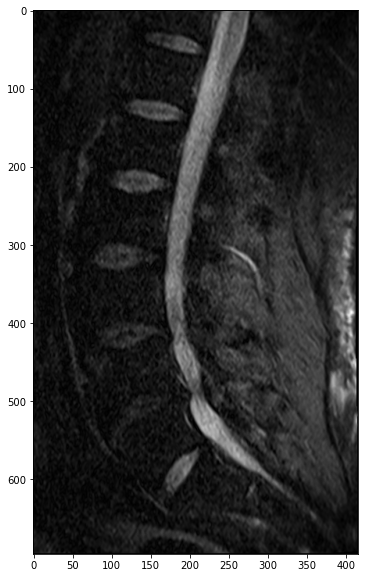

In [73]:
plt.imshow(s_s[0][8], cmap='gray')

In [52]:
len(cases_three_contrasts)

159

In [83]:
dicom2nifti.dicom_series_to_nifti("/mnt/datasets/ben/synth_testing/all_data/Ra_Mri_Spine_Thoracic_Without_Contrast_-_1004644220/SAG_T1_6", "test.nii.gz", reorient_nifti=True)

IndexError: list index out of range

In [ ]:
def dcm_to_sitk(fpath_dcm):
    series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(fpath_dcm)
    series_files = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(fpath_dcm, series_ids[0])

    img_reader = sitk.ImageSeriesReader()
    img_reader.SetFileNames(series_files)
    img_reader.MetaDataDictionaryArrayUpdateOn()
    img_reader.LoadPrivateTagsOn()

    return img_reader.Execute()

In [44]:
import numpy as np
data = np.load("/mnt/raid/jiang/projects/SubtleGAN/data/Spine_coregistered_affine_slices/train/Spine_CTL_Spine_-_1004515256/010.npy")

In [45]:
from skimage.transform import resize
data = data.transpose(1, 2, 0)

In [58]:
data = data.transpose(1, 2, 0)
data = resize(data, (256, int(256*324/192)))
data = data.transpose(2, 0, 1)

In [49]:
data_r.shape

(256, 432, 3)

In [50]:
import matplotlib.pyplot as plt

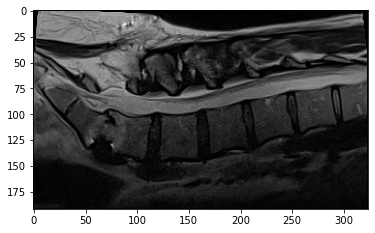

In [55]:
plt.imshow(data[:, :, 1], cmap='gray')

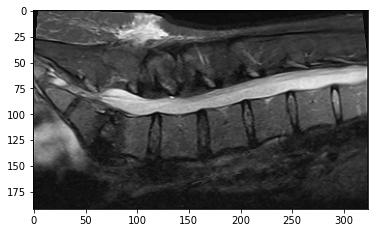

In [54]:
plt.imshow(data[:, :, 2], cmap='gray')

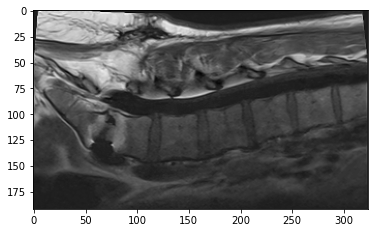

In [56]:
plt.imshow(data[:, :, 0], cmap='gray')